In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_log = pd.read_csv("CGS_data/data/SRP073813/SRP073813_log.csv")
df_meta = pd.read_csv("CGS_data/data/SRP073813/SRP073813_meta.csv")

In [3]:
df_log.set_index("HUGO", inplace = True)
df_meta.set_index("ID", inplace = True)
df_meta = df_meta['refinebio_subject']

In [4]:
df_meta = df_meta.to_frame()

In [5]:
df_log =round(df_log)
df_log = df_log.T

In [6]:
df_log = df_log.loc[:, ~df_log.columns.duplicated()]

In [7]:
df_log = df_log[df_log["refinebio_subject"].str.contains('nacc')]
df_meta = df_meta[df_meta["refinebio_subject"].str.contains('nacc')]

In [8]:
df_log.drop("refinebio_subject", axis = 1, inplace = True)

In [9]:
dds = DeseqDataSet(counts =df_log,metadata = df_meta,design_factors ="refinebio_subject") 

C:\Users\Shlok\AppData\Local\Temp\ipykernel_4216\2207402584.py:1: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts =df_log,metadata = df_meta,design_factors ="refinebio_subject")
C:\Users\Shlok\AppData\Local\Programs\Python\Python310\lib\site-packages\pydeseq2\dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [10]:
dds.deseq2()

Fitting size factors...
... done in 0.38 seconds.

Fitting dispersions...
... done in 30.63 seconds.

Fitting dispersion trend curve...
... done in 24.97 seconds.

C:\Users\Shlok\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Shlok\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
... done in 136.40 seconds.

Fitting LFCs...
... done in 13.63 seconds.

Refitting 0 outliers.



In [11]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [12]:
import scanpy as sc

In [13]:
dds

AnnData object with n_obs × n_vars = 114 × 29294
    obs: 'refinebio-subject'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [14]:
sc.tl.pca(dds)

C:\Users\Shlok\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


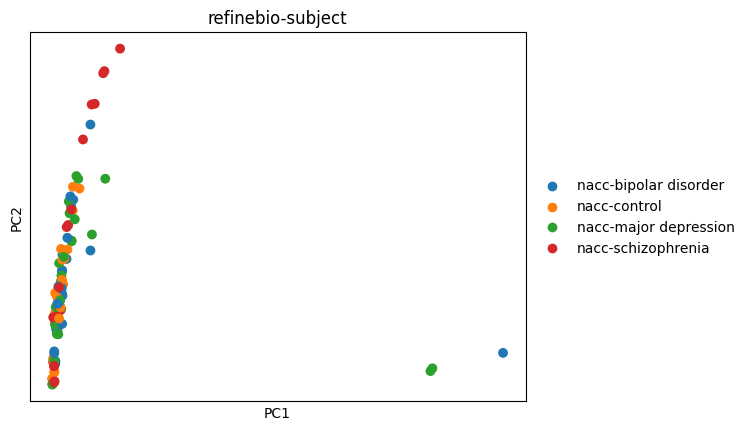

In [15]:
sc.pl.pca(dds, size = 200, color ='refinebio-subject')

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns

In [17]:
model = TSNE(learning_rate = 50)
tsne_features = model.fit_transform(df_log.to_numpy())

In [20]:
df_log['x'] = tsne_features[:,0]
df_log['y'] = tsne_features[:,1]
df_log =df_log.join(df_meta)

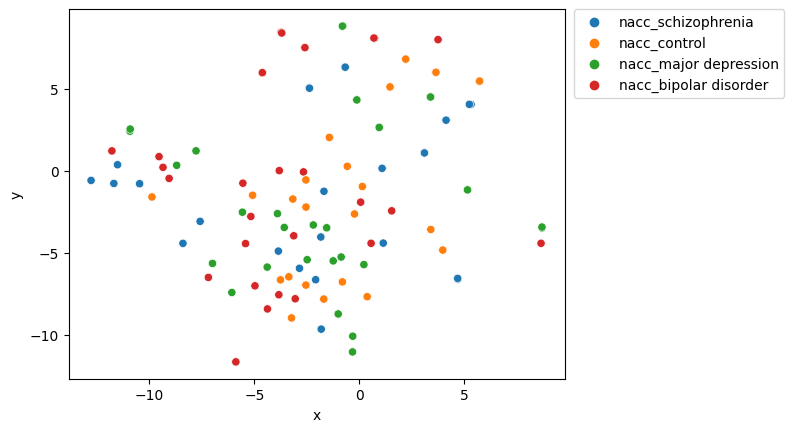

In [21]:
sns.scatterplot(x = 'x', y = 'y', hue = 'refinebio_subject', data=df_log)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()